In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
year = 2012  
month = 2

# generate the data file path
datapath = os.path.join('.','data', f'{year}-{month:02}-power-survey-london.csv')

data = pd.read_csv(datapath)

In [4]:
data.head()

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,M_count,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std
0,2012-02-01 00:00:00,3.771,0.126,2.798,8.346,50.005000,12.731,3.940,3.967,0.108,...,5,2,4,8,79,5,494,117.266000,0.237381,0.301358
1,2012-02-01 00:30:00,3.555,0.110,1.809,7.641,75.293999,10.839,8.117,2.857,0.067,...,5,2,4,8,79,5,494,179.440999,0.363241,0.838331
2,2012-02-01 01:00:00,3.831,0.068,0.956,5.945,69.944999,11.403,7.433,2.239,0.115,...,5,2,4,8,79,5,494,161.779999,0.327490,0.763164
3,2012-02-01 01:30:00,2.852,0.085,0.925,4.808,65.013001,9.690,6.815,2.260,0.088,...,5,2,4,8,79,5,494,144.735001,0.292986,0.704198
4,2012-02-01 02:00:00,2.224,0.097,1.071,3.847,64.112000,9.169,6.797,1.797,0.091,...,5,2,4,8,79,5,494,136.147000,0.275601,0.674146


In [5]:
from datetime import datetime

# Create two functions that will allow us to create data based on the data in each row.

def dayCalc(row):
    return pd.to_datetime(row['datetime']).day

def tstampCalc(row):
    return f"{pd.to_datetime(row['datetime']).hour}:{pd.to_datetime(row['datetime']).minute:02}"
    
# Create new columns for the day of the month and also a column for the time stamp (e.g. 20:30).

data['day'] = data.apply(dayCalc, axis = 1)
data['tstamp'] = data.apply(tstampCalc, axis = 1)

In [6]:
data.head()

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
0,2012-02-01 00:00:00,3.771,0.126,2.798,8.346,50.005000,12.731,3.940,3.967,0.108,...,4,8,79,5,494,117.266000,0.237381,0.301358,1,0:00
1,2012-02-01 00:30:00,3.555,0.110,1.809,7.641,75.293999,10.839,8.117,2.857,0.067,...,4,8,79,5,494,179.440999,0.363241,0.838331,1,0:30
2,2012-02-01 01:00:00,3.831,0.068,0.956,5.945,69.944999,11.403,7.433,2.239,0.115,...,4,8,79,5,494,161.779999,0.327490,0.763164,1,1:00
3,2012-02-01 01:30:00,2.852,0.085,0.925,4.808,65.013001,9.690,6.815,2.260,0.088,...,4,8,79,5,494,144.735001,0.292986,0.704198,1,1:30
4,2012-02-01 02:00:00,2.224,0.097,1.071,3.847,64.112000,9.169,6.797,1.797,0.091,...,4,8,79,5,494,136.147000,0.275601,0.674146,1,2:00


In [7]:
Soccer_leaguecup_Final = data.loc[data['day']==26]
Soccer_leaguecup_Final = Soccer_leaguecup_Final.set_index(Soccer_leaguecup_Final["tstamp"])
Soccer_leaguecup_Final.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-02-26 00:00:00,5.106,0.152,3.346,10.957,71.297000,15.416,3.869,4.704,0.103,...,4,23,96,6,679,148.952000,0.219370,0.333670,26,0:00
0:30,2012-02-26 00:30:00,4.206,0.114,3.389,10.670,110.594001,15.270,6.896,3.613,0.084,...,4,23,97,6,679,254.389001,0.374652,0.809568,26,0:30
1:00,2012-02-26 01:00:00,3.645,0.102,2.035,10.592,100.233000,15.407,7.049,2.932,0.081,...,4,23,97,6,679,230.318000,0.339202,0.728401,26,1:00
1:30,2012-02-26 01:30:00,2.715,0.086,1.945,10.411,84.184000,13.427,6.639,2.564,0.171,...,4,23,97,6,679,193.853000,0.285498,0.625228,26,1:30
2:00,2012-02-26 02:00:00,3.089,0.099,2.008,8.932,78.241000,10.518,6.448,2.578,0.120,...,4,23,97,6,679,173.399000,0.255374,0.563740,26,2:00


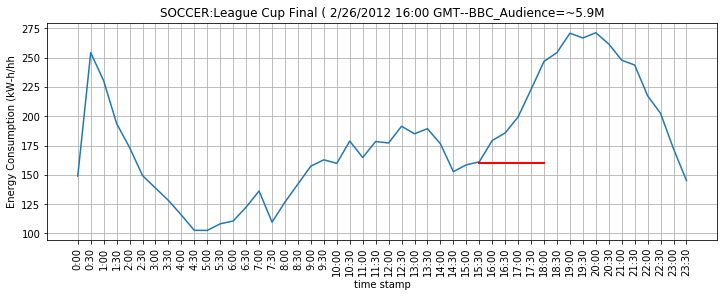

In [8]:
# Plot the day's energy consumption.


plt.figure(figsize=(12,4))
plt.plot(Soccer_leaguecup_Final["tstamp"],Soccer_leaguecup_Final["sigma"])
plt.xticks(rotation='vertical')
plt.title("SOCCER:League Cup Final ( 2/26/2012 16:00 GMT--BBC_Audience=~5.9M")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.plot(['15:30', '18:00'], [160, 160], color='r', linestyle='-', linewidth=2)
plt.grid()


plt.show()